<a href="https://colab.research.google.com/github/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/blob/main/INFO5505_Linear_Regression_(Assignment_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO5505_Machine_Learning_for_Data_Scientist 

Linear Regression (Assignment 1) 

@Ramesh Ghimire


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Tasks: 1. Create at least two simple linear regression models, each of them has one different independent variable (you may transform the raw independent variable into different formats, such as to conduct a logarithmic transformation or combine two variables into a new variable such as Size = width * height). You may consider one variable as Size, and another one as Width. Create a scatter plot for showing the relationship between the independent variable and the dependent variable for each model, and also showing the linear regression line in the same plot. Calculate the error of the prediction with test data. 

In [ ]:
#reading the data from gitlab
df=pd.read_csv("https://raw.githubusercontent.com/rghimre3/INFO5505_Machine_Learning_for_Data_Scientist/main/monet.csv")

In [ ]:
#cheking fist 5 observation and checking shape, data types and info
print(df.head(20)) 
print("   ")
print(df.shape) 
print("   ")
print(df.describe())
print("   ")
print(df.info)

       PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0   3.993780    21.3   25.6       1        1       1
1   8.800000    31.9   25.6       1        2       2
2   0.131694     6.9   15.9       0        3       3
3   2.037500    25.7   32.0       1        4       2
4   1.487500    25.7   32.0       1        4       2
5   1.870000    25.6   31.9       1        4       1
6   5.282500    25.5   35.6       1        5       1
7   5.065750    26.0   34.3       1        5       2
8   1.375000    25.6   36.2       1        5       2
9   2.530000    25.6   36.4       1        6       2
10  3.742500    25.6   36.4       1        6       2
11  0.364343    25.6   36.2       1        7       2
12  2.723870    31.9   39.4       1        8       2
13  3.520000    23.6   31.9       1        9       1
14  0.497500    19.5   25.0       1       10       2
15  9.350000    32.7   26.8       1       11       1
16  1.219500    25.5   36.0       1       12       2
17  0.407000    25.6   39.4       1       12  

In [ ]:
print(df.dtypes)
# data no need data typecasting 

PRICE      float64
HEIGHT     float64
WIDTH      float64
SIGNED       int64
PICTURE      int64
HOUSE        int64
dtype: object


In [ ]:
print(df.isnull().sum())

# there seems no null in the data 

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dc9cf0e20>,
      dtype=object)

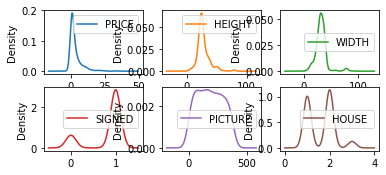

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)



In [ ]:
df['AREA']=df['HEIGHT']*df['WIDTH']

In [ ]:
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


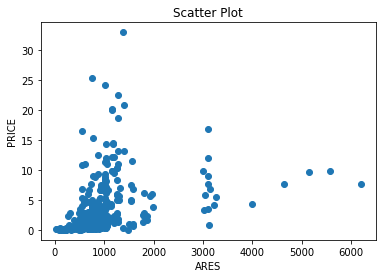

In [ ]:
plt.scatter(df['AREA'], df['PRICE'])
# add labels and title
plt.xlabel('ARES')
plt.ylabel('PRICE')
plt.title('Scatter Plot')

# display the plot
plt.show()

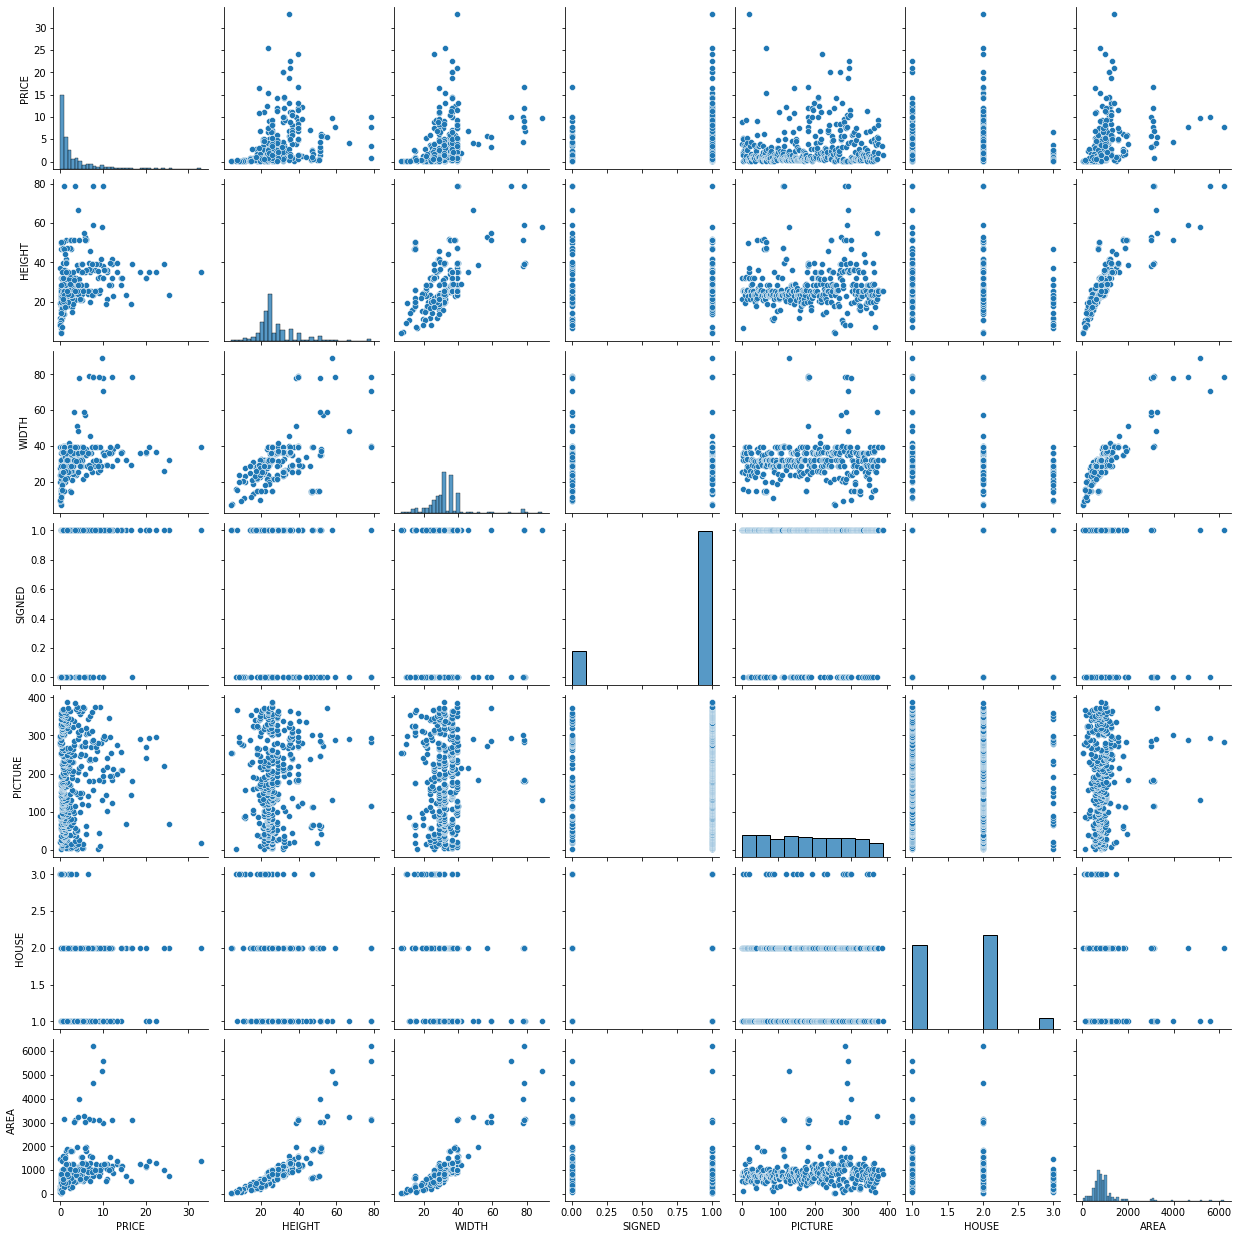

In [ ]:
sns.pairplot(df)


In [ ]:
Area = np.array(df['AREA'])
Price = np.array(df['PRICE'])
Width= np.array(df['WIDTH'])

This is the molde 1 WITH AREA AS INDEPENDEND VARIBLE 

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Area.reshape(-1,1), Price, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [0.00207643]
Intercept:  1.1538408583422475


The formula for linear regression with the given coefficients is:

price = 0.00207643 * area + 1.1538408583422475

Here, "price" represents the predicted value of the dependent variable, "area" represents the value of the independent variable, and the coefficients are the slope (0.00207643) and the intercept (1.1538408583422475).

To interpret this result, the coefficient of 0.00207643 means that for every unit increase in the independent variable (area), we expect the dependent variable (price) to increase by 0.00207643 units, assuming all other factors remain constant. The intercept of 1.1538408583422475 means that when the independent variable (area) is equal to zero, the predicted value of the dependent variable (price) is 1.1538408583422475.

In summary, the linear regression formula shows the relationship between the independent and dependent variables and can be used to predict the value of the dependent variable (price) given a value of the independent variable (area). The coefficient of 0.00207643 suggests that the relationship between price and area is positive and linear, indicating that the larger the area, the higher the price. The intercept of 1.1538408583422475 represents the base price when the area is zero.

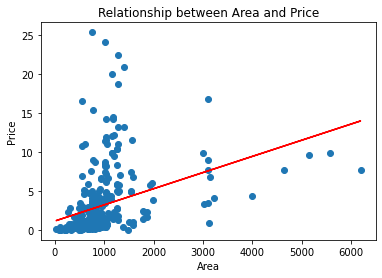

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of the data
plt.scatter(X_train, y_train)

# add the linear regression line to the plot
plt.plot(X_train, model.predict(X_train), color='red')

# add axis labels and a title to the plot
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Relationship between Area and Price')

# display the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate performance metrics on the testing data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.43
Mean Squared Error: 18.65
R-squared Score: 0.11


The performance metrics of the model that you have mentioned are:

Mean Absolute Error (MAE) of 2.43
Mean Squared Error (MSE) of 18.65
R-squared (R2) Score of 0.11
The MAE of 2.43 means that on average, the model's predictions of the price based on the area are off by approximately $2.43. This metric provides a measure of the model's accuracy in predicting the price.

The MSE of 18.65 means that the average squared difference between the predicted price and the actual price is 18.65. The MSE penalizes larger errors more than the MAE, so it is more sensitive to outliers.

The R-squared score of 0.11 means that only 11% of the variability in the price can be explained by the area. In other words, the model is not able to capture most of the variation in the price based on the area alone. A higher R-squared score indicates a better fit of the model to the data.

In summary, the model has a relatively high error rate (MAE and MSE) and a low R-squared score, indicating that it is not performing well in predicting the price based on the area alone. There may be other factors that have a stronger influence on the price that the model is not capturing.

This is the molde 2 WITH WIDTH AS INDEPENDEND VARIBLE 


In [ ]:
# split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(Width.reshape(-1,1), Price, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X1_train, y1_train)

# make predictions on the testing data
y1_pred = model.predict(X1_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [0.13627626]
Intercept:  -1.2354033423356676


The formula for linear regression with the given coefficients is:
price  = 0.13627626 * width - 1.2354033423356676

Here, "price" represents the predicted value of the dependent variable, "width" represents the value of the independent variable, and the coefficients are the slope (0.13627626) and the intercept (-1.2354033423356676).

To interpret this result, the coefficient of 0.13627626 means that for every unit increase in the independent variable width, we expect the dependent variable price to increase by 0.13627626 units, assuming all other factors remain constant. The intercept of -1.2354033423356676 means that when the independent variable width is equal to zero, the predicted value of the dependent variable price is -1.2354033423356676.



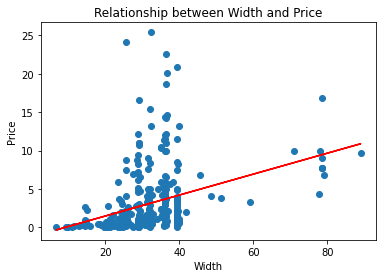

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of the data
plt.scatter(X1_train, y1_train)

# add the linear regression line to the plot
plt.plot(X1_train, model.predict(X1_train), color='red')

# add axis labels and a title to the plot
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Relationship between Width and Price')

# display the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate performance metrics on the testing data
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.45
Mean Squared Error: 18.52
R-squared Score: 0.12


The performance metrics of the model that you have mentioned are:

Mean Absolute Error (MAE) of 2.45
Mean Squared Error (MSE) of 18.52
R-squared (R2) Score of 0.12
The MAE of 2.45 means that on average, the model's predictions of the price based on the width are off by approximately $2.45. This metric provides a measure of the model's accuracy in predicting the price.

The MSE of 18.52 means that the average squared difference between the predicted price and the actual price is 18.52. The MSE penalizes larger errors more than the MAE, so it is more sensitive to outliers.

The R-squared score of 0.12 means that only 12% of the variability in the price can be explained by the width. In other words, the model is not able to capture most of the variation in the price based on the width alone. A higher R-squared score indicates a better fit of the model to the data.

In summary, the model has a relatively high error rate (MAE and MSE) and a low R-squared score, indicating that it is not performing well in predicting the price based on the width alone. There may be other factors that have a stronger influence on the price that the model is not capturing.

2. Create a multivariate linear regression model. You may need to consider the normalization of the raw data. Calculate the error of the prediction with test data. 

In [ ]:
new_columns = {column: column.strip() for column in df.columns}
df1 = df.rename(columns=new_columns)

In [ ]:
X2 = df1[['AREA', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE']].values
y2 = df1['PRICE'].values

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
mean = X2_train.mean(axis=0)
std = X2_train.std(axis=0)
X2_train = (X2_train - mean) / std
X2_test = (X2_test - mean) / std

In [ ]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y2_pred = model.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
print("Mean squared error:", mse)

Mean squared error: 15.35408581200736


In [ ]:

# fit the model to the training data
model.fit(X2_train, y2_train)

# make predictions on the testing data
y2_pred = model.predict(X2_test)

# print the model's coefficients
print('Coefficients: ', model.coef_)

# print the model's intercept
print('Intercept: ', model.intercept_)

Coefficients:  [-0.71142658  1.11915081  1.78959303  0.75425404  0.39997816  0.3172932 ]
Intercept:  2.9998086773255808


In [ ]:
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# print the performance metrics
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared Score: {:.2f}'.format(r2))

Mean Absolute Error: 2.55
Mean Squared Error: 15.35
R-squared Score: 0.15
